# Project 2 AssignmentStatistical Analysis of Ugandan Restaurant Data (UGX)

In [88]:
# import the necessary packages
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

# Loading our dataset

In [89]:
# load the dataset
df = pd.read_csv('gb_restaurant_project_data.csv',col_index="CustomerID")

In [90]:
# Explore the first few lines of the dataset
df.head()

,CustomerID,Total_Bill_Amt,Tip_Amount_UGX,Gender_Cat,Location_City,Meal_Type,Visit_Date,Party_Size
0,CUST001,254831310.17,14875556.00,Male,Gulu,NaN,2024-10-17,4
1,CUST002,185510701.50,10245458.00,Male,Kampala,Vegetarian,2024-02-10,8
2,CUST003,274812484.37,22485573.00,Male,Entebbe,Non-Vegetarian,2024-02-13,6
3,CUST004,425710547.44,36323236.00,Male,Mbarara,NaN,2024-09-05,3
4,CUST005,176826324.55,9120579.00,Female,Entebbe,Kids Meal,2024-02-05,4


In [91]:
# Finding how many records and columns are there in the dataset 
df.shape

(1000, 8)

# 1. Data Cleaning

# Handling missing values

In [92]:
# Find out which colums contain Null values
print("Columns with missing values")
df.columns[df.isnull().any()]

Columns with missing values


Index(['Total_Bill_Amt', 'Tip_Amount_UGX', 'Meal_Type'], dtype='object')

In [93]:
# Count the number of missing values per column
print("No. of missing values per column")
null_columns = df.isnull().sum()
print(null_columns[null_columns > 0])

No. of missing values per column
Total_Bill_Amt     50
Tip_Amount_UGX     50
Meal_Type         100
dtype: int64


In [94]:
# Filling in the missing values of Meal_Type with Unknown value
df['Meal_Type'] = df['Meal_Type'].fillna('Unknown')

# Filling in the missing values of Total_Bill_Amt with the median value
df['Total_Bill_Amt'] = df['Total_Bill_Amt'].fillna(df['Total_Bill_Amt'].median())

# Filling in the missing values of Tip_Amount_UGX with the median value
df['Tip_Amount_UGX'] = df['Tip_Amount_UGX'].fillna(df['Tip_Amount_UGX'].median())

# Detect and address outliers

In [95]:
# Calculate mean, median, and standard deviation
mean_total_bill = df["Total_Bill_Amt"].mean()
median_total_bill = df["Total_Bill_Amt"].median()
std_total_bill = df["Total_Bill_Amt"].std()

# Detect outliers using IQR method
Q1 = df['Total_Bill_Amt'].quantile(0.25)
Q3 = df['Total_Bill_Amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Total_Bill_Amt"] < lower_bound) | (df["Total_Bill_Amt"] > upper_bound)]

print('Mean Total Bill:\t',mean_total_bill,'\nMedian Total Bill:\t', median_total_bill,'\nStandard Deviation:\t',std_total_bill) 
print('Outliers for the Total Bill:', len(outliers))

Mean Total Bill:	 220453428.92292193 
Median Total Bill:	 200629073.77308786 
Standard Deviation:	 121016132.10125135
Outliers for the Total Bill: 42


# Standardise categories

In [96]:
# Checking for mispelt values in the columns of our dataset
print("Mispelt records in the Gender_Cat field")
print(df['Gender_Cat'].value_counts())
print("\n\n---------------------------------------\n\n")
print("Mispelt records in the Location_City field")
print(df['Location_City'].value_counts())
print("\n\n---------------------------------------\n\n")
print("Mispelt records in the Meal_Type field")
print(df['Meal_Type'].value_counts())

Mispelt records in the Gender_Cat field
Gender_Cat
Male      467
Female    436
F          57
M          40
Name: count, dtype: int64


---------------------------------------


Mispelt records in the Location_City field
Location_City
Kampala     305
Entebbe     201
Mbarara     152
Gulu        150
Arua        148
Kampalla     44
Name: count, dtype: int64


---------------------------------------


Mispelt records in the Meal_Type field
Meal_Type
Non-Vegetarian    445
Special           182
Vegetarian        181
Unknown           100
Kids Meal          92
Name: count, dtype: int64


In [97]:
# Unifying the category values in the Gender_Cat column, by stripping, replacing wrongly entered values
df['Gender_Cat'] = df['Gender_Cat'].str.strip().str.title().replace(['M','F'],['Male','Female'])

# Unifying the city values in the Location_City column, by stripping, replacing wrongly entered values
df['Location_City'] = df['Location_City'].str.strip().str.title().replace(['Kampalla'],['Kampala'])

# Remove columns where necessary

In [98]:
# Renaming columns

In [99]:
# Renaming the columns to standardize our naming
#df.rename(columns={'CustomerID': 'Customer_ID'}, inplace=True)
df = df.rename(columns={'CustomerID': 'Customer_ID', 'Total_Bill_Amt': 'Total_Bill_Amount(UGX)', 'Tip_Amount_UGX': 'Tip_Amount(UGX)', 'Gender_Cat': 'Gender_Category'}) # Assigning to df again without using inplace=True

In [100]:
# Listing the columns
df.columns

Index(['Customer_ID', 'Total_Bill_Amount(UGX)', 'Tip_Amount(UGX)',
       'Gender_Category', 'Location_City', 'Meal_Type', 'Visit_Date',
       'Party_Size'],
      dtype='object')

# Save the clean dataset

In [101]:
# Saving our cleaned dataset
df.to_excel("gb_restaurant_project_data_clean.xlsx")

# Convert Visit_Date to datetime format

In [102]:
# Converting our Visit_Date to datetime format
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'], errors='coerce')

# 2. Descriptive Statistics

In [103]:
# Handle missing values (impute or drop)
# Displaying information about the 'Total_Bill_Amt' column
total_bill_info = df['Total_Bill_Amount(UGX)'].describe(include='all')
missing_count = df['Total_Bill_Amount(UGX)'].isna().sum()
total_rows = len(df)
print('\nDescription of Total_Bill_Amount')
print(total_bill_info)
print('\nNo of missing values: ',missing_count)
print('Total number of records: ', total_rows)

print("\n\n---------------------------------------\n")

# Handle missing values (impute or drop)
# Displaying information about the 'Tip_Amount_UGX' column
tip_amount_info = df['Tip_Amount(UGX)'].describe(include='all')
missing_count = df['Tip_Amount(UGX)'].isna().sum()
total_rows = len(df)
print('\nDescription of Tip_Amount')
print(tip_amount_info)
print('\nNo of missing values: ',missing_count)
print('Total number of records: ', total_rows)

print("\n\n---------------------------------------\n")

# Handle missing values (impute or drop)
# Displaying information about the 'Party_Size' column
party_size_info = df['Party_Size'].describe(include='all')
missing_count = df['Party_Size'].isna().sum()
total_rows = len(df)
print('\nDescription of Party_Size')
print(party_size_info)
print('\nNo of missing values: ',missing_count)
print('Total number of records: ', total_rows)


Description of Total_Bill_Amount
count         1000.00
mean     220453428.92
std      121016132.10
min        5032493.80
25%      143484669.64
50%      200629073.77
75%      269992535.48
max     1364591596.77
Name: Total_Bill_Amount(UGX), dtype: float64

No of missing values:  0
Total number of records:  1000


---------------------------------------


Description of Tip_Amount
count       1000.00
mean    16600013.34
std      9780664.40
min       122375.00
25%     10094832.00
50%     14781722.50
75%     20666478.25
max     95441091.00
Name: Tip_Amount(UGX), dtype: float64

No of missing values:  0
Total number of records:  1000


---------------------------------------


Description of Party_Size
count   1000.00
mean       7.00
std       11.22
min        1.00
25%        3.00
50%        6.00
75%        8.00
max      100.00
Name: Party_Size, dtype: float64

No of missing values:  0
Total number of records:  1000


In [104]:
# Handling missing values in the Total_Bill_Amt column
# Changing Total_Bill_Amt to thousands
print ("Measures for Total_Bill in (UGX'000)")
df["Total_Bill_Amount(UGX'000)"] = df['Total_Bill_Amount(UGX)']/1000 

total_bill_info = df["Total_Bill_Amount(UGX'000)"].describe()
total_bill_missing = df["Total_Bill_Amount(UGX'000)"].isnull().sum()
total_bill_dtypes = df["Total_Bill_Amount(UGX'000)"].dtype
total_bill_records = len(df["Total_Bill_Amount(UGX'000)"])
print(total_bill_info)
print('\nNumber of missing values : ',total_bill_missing)
print('\nTotal records : ',total_bill_records)
print(f'\n Percent of missing values: {round(total_bill_missing/total_bill_records*100,2)}%')
total_bill_dtypes

print("\n\n---------------------------------------\n\n")
print ("Measures for Tip_Amount in (UGX'000)")
df["Tip_Amount(UGX'000)"] = df['Tip_Amount(UGX)']/1000 

tip_amount_info = df["Tip_Amount(UGX'000)"].describe()
tip_amount_missing = df["Tip_Amount(UGX'000)"].isnull().sum()
tip_amount_dtype = df["Tip_Amount(UGX'000)"].dtype
tip_amount_records = len(df["Tip_Amount(UGX'000)"])
print(tip_amount_info)
print('\nNumber of missing values : ',tip_amount_missing)
print('\nTotal records : ',tip_amount_records)
print(f'\n Percent of missing values: {round(tip_amount_missing/tip_amount_records*100,2)}%')
tip_amount_dtype

print("\n\n---------------------------------------\n\n")
print ("Measures for Party Size")

party_size_info = df["Party_Size"].describe()
party_size_missing = df["Party_Size"].isnull().sum()
party_size_dtype = df["Party_Size"].dtype
party_size_records = len(df["Party_Size"])
print(party_size_info)
print('\nNumber of missing values : ',party_size_missing)
print('\nTotal records : ',party_size_records)
print(f'\n Percent of missing values: {round(party_size_missing/party_size_records*100,2)}%')
party_size_dtype

Measures for Total_Bill in (UGX'000)
count      1000.00
mean     220453.43
std      121016.13
min        5032.49
25%      143484.67
50%      200629.07
75%      269992.54
max     1364591.60
Name: Total_Bill_Amount(UGX'000), dtype: float64

Number of missing values :  0

Total records :  1000

 Percent of missing values: 0.0%


---------------------------------------


Measures for Tip_Amount in (UGX'000)
count    1000.00
mean    16600.01
std      9780.66
min       122.38
25%     10094.83
50%     14781.72
75%     20666.48
max     95441.09
Name: Tip_Amount(UGX'000), dtype: float64

Number of missing values :  0

Total records :  1000

 Percent of missing values: 0.0%


---------------------------------------


Measures for Party Size
count   1000.00
mean       7.00
std       11.22
min        1.00
25%        3.00
50%        6.00
75%        8.00
max      100.00
Name: Party_Size, dtype: float64

Number of missing values :  0

Total records :  1000

 Percent of missing values: 0.0%


dtype('int64')

In [105]:
# Confirming that the Gender column values are updated
print("Count of Gender Categories")
print(df['Gender_Category'].value_counts())

print("\n\nGender Category By Percentage")
gender_by_percentage = ((df['Gender_Category'].value_counts())/len(df))*100
gender_by_percentage

Count of Gender Categories
Gender_Category
Male      507
Female    493
Name: count, dtype: int64


Gender Category By Percentage


Gender_Category
Male     50.70
Female   49.30
Name: count, dtype: float64

In [106]:
# Confirming that the Location_City column values are updated
print("Count of Location Cities")
print(df['Location_City'].value_counts())

print("\nLocation By Percentage")
location_by_percentage = ((df['Location_City'].value_counts())/len(df))*100
location_by_percentage

Count of Location Cities
Location_City
Kampala    349
Entebbe    201
Mbarara    152
Gulu       150
Arua       148
Name: count, dtype: int64

Location By Percentage


Location_City
Kampala   34.90
Entebbe   20.10
Mbarara   15.20
Gulu      15.00
Arua      14.80
Name: count, dtype: float64

In [107]:
# Confirming that the Meal_Type column values are updated
print("Count of Meal Types")
print(df['Meal_Type'].value_counts())

print("\nMeal Type By Percentage")
meal_type_by_percentage = ((df['Meal_Type'].value_counts())/len(df))*100
meal_type_by_percentage

Count of Meal Types
Meal_Type
Non-Vegetarian    445
Special           182
Vegetarian        181
Unknown           100
Kids Meal          92
Name: count, dtype: int64

Meal Type By Percentage


Meal_Type
Non-Vegetarian   44.50
Special          18.20
Vegetarian       18.10
Unknown          10.00
Kids Meal         9.20
Name: count, dtype: float64

# Visualization the distribution

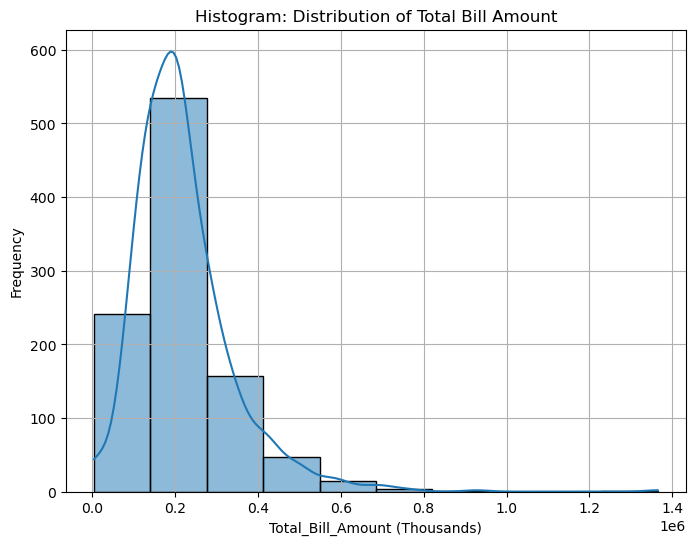

In [108]:
plt.figure(figsize=(8,6))
sns.histplot(df["Total_Bill_Amount(UGX'000)"], bins=10, kde=True)
plt.title('Histogram: Distribution of Total Bill Amount')
plt.xlabel('Total_Bill_Amount (Thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

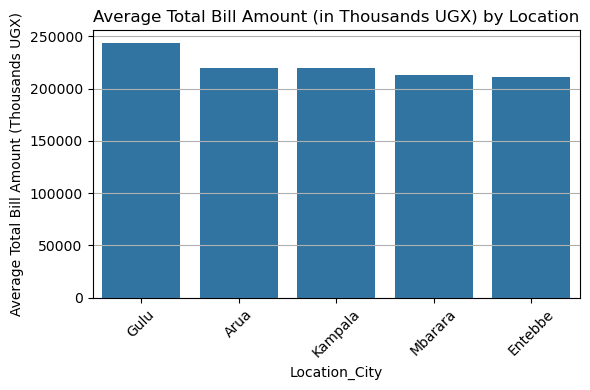

In [109]:
# Create a bar chart showing average bill by location
# Group by Location and compute average total bill amount in thousands
avg_bill_by_location = (
    df.groupby('Location_City')["Total_Bill_Amount(UGX'000)"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_bill_by_location.index, y=avg_bill_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Total Bill Amount (in Thousands UGX) by Location')
plt.xlabel('Location_City')
plt.ylabel('Average Total Bill Amount (Thousands UGX)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

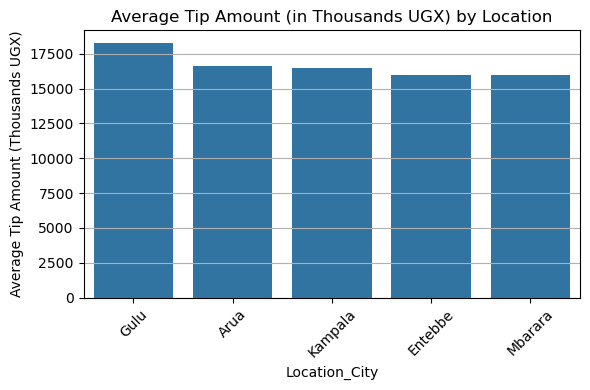

In [110]:
# Create a bar chart showing average tip amount by location
# Group by Location and compute average tip amount in thousands
avg_tip_amt_by_location = (
    df.groupby('Location_City')["Tip_Amount(UGX'000)"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_tip_amt_by_location.index, y=avg_tip_amt_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Tip Amount (in Thousands UGX) by Location')
plt.xlabel('Location_City')
plt.ylabel('Average Tip Amount (Thousands UGX)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

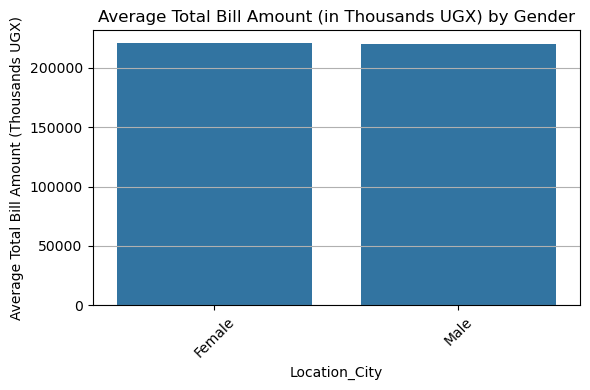

In [111]:
# Create a bar chart showing average bill by location
# Group by Location and compute average total bill amount in thousands
avg_bill_by_location = (
    df.groupby('Gender_Category')["Total_Bill_Amount(UGX'000)"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_bill_by_location.index, y=avg_bill_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Total Bill Amount (in Thousands UGX) by Gender')
plt.xlabel('Location_City')
plt.ylabel('Average Total Bill Amount (Thousands UGX)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

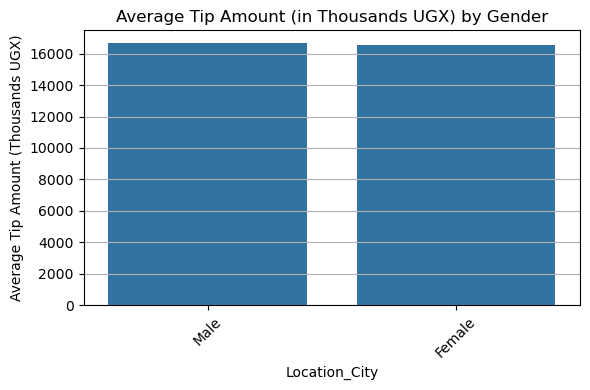

In [112]:
# Create a bar chart showing average tip amount by location
# Group by Location and compute average tip amount in thousands
avg_tip_amt_by_location = (
    df.groupby('Gender_Category')["Tip_Amount(UGX'000)"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_tip_amt_by_location.index, y=avg_tip_amt_by_location.values)
plt.xticks(rotation=45)
plt.title('Average Tip Amount (in Thousands UGX) by Gender')
plt.xlabel('Location_City')
plt.ylabel('Average Tip Amount (Thousands UGX)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Cross-Tabulations and Group-By

# Create cross-tabs (e.g., Gender vs. Location, Meal_Type vs. Location).

In [113]:
# Create a cross-tabulation (frequency matrix)
gender_location_crosstab = pd.crosstab(
    index=df['Gender_Category'],
    columns=df['Location_City'],
    margins=True,
    margins_name='Total'
)

# Displaying the crosstab
print("Frequency Matrix: Gender vs Location")
print(gender_location_crosstab)

Frequency Matrix: Gender vs Location
Location_City    Arua  Entebbe  Gulu  Kampala  Mbarara  Total
Gender_Category                                              
Female             83       94    63      181       72    493
Male               65      107    87      168       80    507
Total             148      201   150      349      152   1000


In [114]:
# Create a cross-tabulation (frequency matrix)
meal_location_crosstab = pd.crosstab(
    index=df['Meal_Type'],
    columns=df['Location_City'],
    margins=True,
    margins_name='Total'
)

# Displaying the crosstab
print("Frequency Matrix: Meal Type vs Location")
print(meal_location_crosstab)

Frequency Matrix: Meal Type vs Location
Location_City   Arua  Entebbe  Gulu  Kampala  Mbarara  Total
Meal_Type                                                   
Kids Meal         14       24    16       28       10     92
Non-Vegetarian    62       93    62      152       76    445
Special           26       32    33       71       20    182
Unknown           16       19    12       29       24    100
Vegetarian        30       33    27       69       22    181
Total            148      201   150      349      152   1000


In [115]:
pd.crosstab(df['Gender_Category'], df['Location_City'])


Location_City,Arua,Entebbe,Gulu,Kampala,Mbarara
Gender_Category,,,,,
Female,83,94,63,181,72
Male,65,107,87,168,80


In [116]:
pd.crosstab(df['Meal_Type'], df['Location_City'])

Location_City,Arua,Entebbe,Gulu,Kampala,Mbarara
Meal_Type,,,,,
Kids Meal,14,24,16,28,10
Non-Vegetarian,62,93,62,152,76
Special,26,32,33,71,20
Unknown,16,19,12,29,24
Vegetarian,30,33,27,69,22


# Group by Location or Gender to compute mean Total_Bill, Tip_Amount.

In [117]:
# Group by Location
df.groupby('Location_City')[["Total_Bill_Amount(UGX'000)", "Tip_Amount(UGX'000)"]].mean()

,Total_Bill_Amount(UGX'000),Tip_Amount(UGX'000)
Location_City,,
Arua,219890.84,16629.69
Entebbe,210966.75,15990.19
Gulu,243653.36,18264.05
Kampala,219607.58,16505.60
Mbarara,212593.55,15952.16


In [118]:
# Group by Gender
df.groupby('Gender_Category')[["Total_Bill_Amount(UGX'000)", "Tip_Amount(UGX'000)"]].mean()

,Total_Bill_Amount(UGX'000),Tip_Amount(UGX'000)
Gender_Category,,
Female,220631.25,16548.56
Male,220280.52,16650.04


In [119]:
# Finding the mean-average, median-middle value, standard deviation and number of people per gender category

In [120]:
df.groupby('Gender_Category')[["Total_Bill_Amount(UGX'000)", "Tip_Amount(UGX'000)"]].agg(['mean', 'median', 'std', 'count'])


Total_Bill_Amount(UGX'000)                            \
                                      mean    median       std count   
Gender_Category                                                        
Female                           220631.25 200629.07 120925.27   493   
Male                             220280.52 200629.07 121223.60   507   

                Tip_Amount(UGX'000)                         
                               mean   median     std count  
Gender_Category                                             
Female                     16548.56 14781.72 9896.08   493  
Male                       16650.04 14781.72 9676.63   507

In [121]:
# Calculate average balance by location and gender
# Group by location and gender the compute mean
avarage_total_bill_by_location_gender = df.groupby(['Location_City','Gender_Category'])["Total_Bill_Amount(UGX'000)"].mean().sort_values(ascending=False)

In [122]:
print("Mean of Total Bill by Loacation_Gender")
avarage_total_bill_by_location_gender

Mean of Total Bill by Loacation_Gender


Location_City  Gender_Category
Gulu           Male              243933.26
               Female            243266.82
Arua           Female            226902.00
Kampala        Male              222461.63
Mbarara        Female            220038.69
Kampala        Female            216958.51
Entebbe        Male              214056.67
Arua           Male              210938.13
Entebbe        Female            207449.50
Mbarara        Male              205892.92
Name: Total_Bill_Amount(UGX'000), dtype: float64

In [123]:
# Calculate average Total Bill by location
# Group by location the compute mean
avarage_total_bill_by_location = df.groupby(['Location_City'])["Total_Bill_Amount(UGX'000)"].mean().sort_values(ascending=False)
print("Mean of Total Bill by Loacation")
avarage_total_bill_by_location


Mean of Total Bill by Loacation


Location_City
Gulu      243653.36
Arua      219890.84
Kampala   219607.58
Mbarara   212593.55
Entebbe   210966.75
Name: Total_Bill_Amount(UGX'000), dtype: float64

In [124]:
# Calculate average Total Bill by gender
# Group by gender the compute mean
avarage_total_bill_by_gender = df.groupby(['Gender_Category'])["Total_Bill_Amount(UGX'000)"].mean().sort_values(ascending=False)
print("Mean of Total Bill by Gender")
avarage_total_bill_by_gender

Mean of Total Bill by Gender


Gender_Category
Female   220631.25
Male     220280.52
Name: Total_Bill_Amount(UGX'000), dtype: float64

# Visualize with stacked bar charts or heatmaps.

Text(0.5, 1.0, 'Crosstabulation of Gender vs Location')

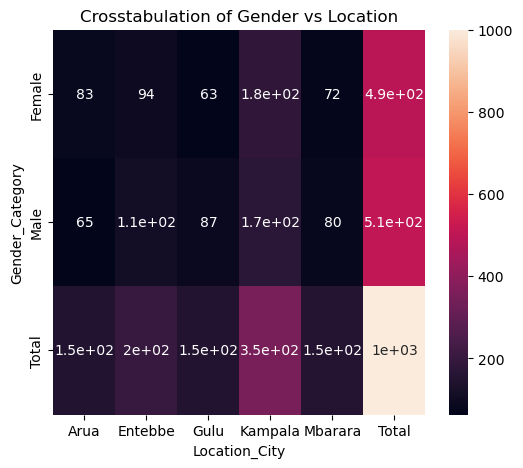

In [125]:
plt.figure(figsize=(6,5))
sns.heatmap(gender_location_crosstab,annot=True)
plt.title('Crosstabulation of Gender vs Location')

Text(0.5, 1.0, 'Crosstabulation of Meal Type vs Location')

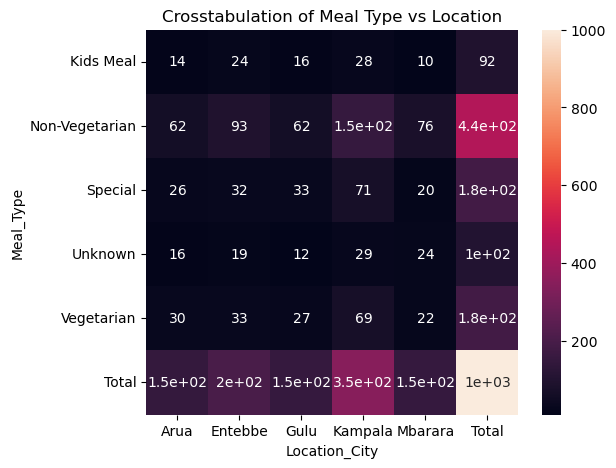

In [127]:
plt.figure(figsize=(6,5))
sns.heatmap(meal_location_crosstab,annot=True)
plt.title('Crosstabulation of Meal Type vs Location')

# 4. Hypothesis Testing

# One-Sample t-Test: Test if average Total_Bill equals 200,000 UGX

# Step1: creating the male and female variables

In [128]:
import scipy.stats as stats
from scipy import stats

In [129]:
# Step1: creating the male and female variables
var_males =df[df['Gender_Category'] == 'Male']['Tip_Amount(UGX)']
var_females =df[df['Gender_Category'] == 'Female']['Tip_Amount(UGX)']

In [130]:
print(f"The male tip_amount are {var_males}")
print(f"The female tip_amount are {var_males}")

The male tip_amount are 0     14875556.00
1     10245458.00
2     22485573.00
3     36323236.00
7     22485118.00
          ...    
992   13018143.00
993    8453535.00
994    9702863.00
996   14781722.50
999   13335620.00
Name: Tip_Amount(UGX), Length: 507, dtype: float64
The female tip_amount are 0     14875556.00
1     10245458.00
2     22485573.00
3     36323236.00
7     22485118.00
          ...    
992   13018143.00
993    8453535.00
994    9702863.00
996   14781722.50
999   13335620.00
Name: Tip_Amount(UGX), Length: 507, dtype: float64


# Step 2: Test the hypothesis

In [131]:
# Step2: testing the hypothesis using levene's test
statistics,p = stats.levene(var_males,var_females,center='median')

# Automate the "P" result print out

In [132]:
if p > 0.05:
    print(f"We accept the null hypothesis, since the P value of {round(p,2)} is higher than 0.05. The data is normally distributed")
else:
    print(f"We reject the null hypothesis becuase our p value of {round(p,2)} is less than 0.05. The data is not normally distributed")

We accept the null hypothesis, since the P value of 0.66 is higher than 0.05. The data is normally distributed


In [133]:
# Given that the P value is higher than 0.05 and our data is normally distributed, we accept then null hypothesis.

# Step3: Generate individual means for each gender category

In [134]:
# Step3: Generating individual means

# males mean
males_mean = var_males.mean() 

# females mean
females_mean = var_females.mean()

In [135]:
print(f"The mean for males is {males_mean}")
print(f"The mean females is {females_mean}")

The mean for males is 16650041.267258383
The mean females is 16548564.743407708


# Conclusion

In [136]:
# Conclusion
# It has been discovered that men tip more than women do, with an average tip of 16650041.267258383 versus 16548564.743407708 for women.
# Nonetheless, there is not much of a tipping difference between the two categories.

# Paired t-Test: Compare Total_Bill vs. Tip_Amount for paired observations.

In [137]:
# Paired samples t-test
t_stat, t_p = stats.ttest_rel(df['Total_Bill_Amount(UGX)'], df['Tip_Amount(UGX)'])
print(f"Paired Samples T-Test for total_bill vs tip_amount: Statistic={t_stat:.4f}, p-value={t_p:.4f}")

Paired Samples T-Test for total_bill vs tip_amount: Statistic=57.5944, p-value=0.0000


In [138]:
# Optional: Interpret results
alpha = 0.05
if t_p < alpha:
    print("Reject the null hypothesis: Significant difference between Total_Bill and Tip_Amount.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference between Total_Bill and Tip_Amount.


In [139]:
# Wilcoxon signed-rank test for paired samples
w_stat, w_p = stats.wilcoxon(df['Total_Bill_Amount(UGX)'], df['Tip_Amount(UGX)'])
print(f"Wilcoxon Signed-Rank Test for total_bill vs tip_amount: Statistic={w_stat:.4f}, p-value={w_p:.4f}")

Wilcoxon Signed-Rank Test for total_bill vs tip_amount: Statistic=0.0000, p-value=0.0000


In [140]:
# T-Test: If p-value < 0.05, the mean difference between total_bill and tip_amount is significant. If p-value ≥ 0.05, it’s not significant.

In [141]:
# Wilcoxon: If p-value < 0.05, the median difference between total_bill and tip_amount is significant. If p-value ≥ 0.05, it’s not significant.
# Since differences may not be normal, the Wilcoxon result is more reliable.

In [142]:
import pandas as pd
from scipy import stats

# Step 1: Calculate the difference
diff = df['Total_Bill_Amount(UGX)'] - df['Tip_Amount(UGX)']

# Step 2: Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df['Total_Bill_Amount(UGX)'], df['Tip_Amount(UGX)'])

# Step 3: Print the result
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Optional: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between Total_Bill and Tip_Amount.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 57.5944
P-value: 0.0000
Reject the null hypothesis: Significant difference between Total_Bill and Tip_Amount.


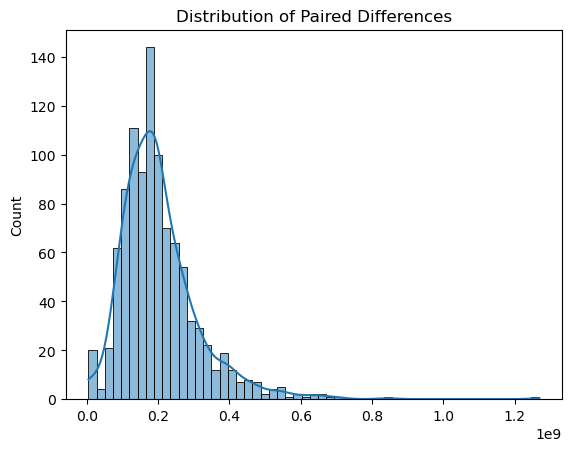

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(diff, kde=True)
plt.title('Distribution of Paired Differences')
plt.show()

# Independent t-Test: Compare Total_Bill between Males and Females.

In [144]:
import pandas as pd
from scipy import stats

# Step 1: Separate the groups
male_bills = df[df['Gender_Category'] == 'Male']['Total_Bill_Amount(UGX)']
female_bills = df[df['Gender_Category'] == 'Female']['Total_Bill_Amount(UGX)']

# Step 2: Perform independent t-test (Welch’s t-test by default)
t_statistic, p_value = stats.ttest_ind(male_bills, female_bills, equal_var=False)

# Step 3: Print the result
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Optional interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in Total_Bill between Males and Females.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic: -0.0458
P-value: 0.9635
Fail to reject the null hypothesis: No significant difference.


In [145]:
# Test for normality: (Shapiro-Wilk)
stats.shapiro(male_bills)
stats.shapiro(female_bills)

ShapiroResult(statistic=0.8947752825696356, pvalue=6.849536938568759e-18)

In [146]:
# Test for equal variances (Levene’s test)
stats.levene(male_bills, female_bills)

LeveneResult(statistic=0.3149399287983815, pvalue=0.5747905322322504)

In [147]:
# If p < 0.05 in Levene’s test, variances are unequal → use equal_var=False (Welch’s t-test).

# If p ≥ 0.05, variances can be assumed equal → set equal_var=True.

# ANOVA: Test if Total_Bill differs across Location (5 cities).

In [148]:
import pandas as pd
from scipy import stats

# Step 1: Separate Total_Bill by Location
groups = [group['Total_Bill_Amount(UGX)'].values for name, group in df.groupby('Location_City')]

# Step 2: Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Step 3: Output results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Optional interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one city's mean Total_Bill is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means across cities.")

F-statistic: 1.8587
P-value: 0.1155
Fail to reject the null hypothesis: No significant difference in means across cities.


In [149]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Total_Bill_Amount(UGX)'], groups=df['Location_City'], alpha=0.05)
print(tukey)


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
 group1  group2    meandiff    p-adj      lower          upper     reject
-------------------------------------------------------------------------
   Arua Entebbe  -8924083.9925 0.9604 -44683242.0437 26835074.0587  False
   Arua    Gulu  23762519.4313 0.4358 -14487803.1882 62012842.0507  False
   Arua Kampala   -283260.8729    1.0 -32667826.8468 32101305.1011  False
   Arua Mbarara  -7297292.7883  0.985 -45422431.5827 30827846.0062  False
Entebbe    Gulu  32686603.4237 0.0897  -2934991.2553 68308198.1028  False
Entebbe Kampala   8640823.1196 0.9283 -20592222.2282 37873868.4675  False
Entebbe Mbarara   1626791.2042 0.9999 -33860347.8054 37113930.2139  False
   Gulu Kampala -24045780.3041 0.2483 -56278383.9264  8186823.3182  False
   Gulu Mbarara -31059812.2195 0.1681 -69055954.5375  6936330.0985  False
Kampala Mbarara  -7014031.9154 0.9755 -39097980.6106 25069916.7798  False
--------------------------------------

# Chi-Squared Test: Test if Gender and Location are independent.

In [150]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Gender_Category'], df['Location_City'])

# Step 2: Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Print the result
print("Chi-squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# Optional interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Gender and Location are not independent.")
else:
    print("Fail to reject the null hypothesis: Gender and Location are independent.")


Chi-squared Statistic: 7.5807643581619235
Degrees of Freedom: 4
P-value: 0.10820020867399811
Fail to reject the null hypothesis: Gender and Location are independent.


In [151]:
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:\n", expected_df)


Expected Frequencies:
 Location_City    Arua  Entebbe  Gulu  Kampala  Mbarara
Gender_Category                                       
Female          72.96    99.09 73.95   172.06    74.94
Male            75.04   101.91 76.05   176.94    77.06


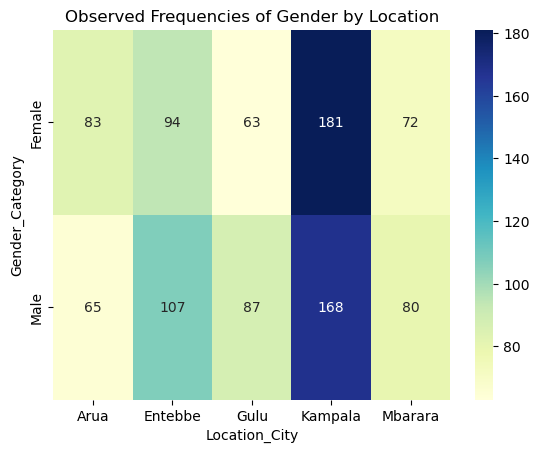

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Observed Frequencies of Gender by Location")
plt.show()

# Check assumptions (normality via Shapiro-Wilk, equal variances via Levene’s).

In [153]:
# This checks if a sample comes from a normal distribution.

In [154]:
from scipy.stats import shapiro

# Example for a group
stat, p_value = shapiro(df['Total_Bill_Amount(UGX)'])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Data is NOT normally distributed (reject H0).")
else:
    print("Data is normally distributed (fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.8694
P-value: 0.0000
Data is NOT normally distributed (reject H0).


In [155]:
# For each group (e.g., Male vs Female):

In [156]:
male_bills = df[df['Gender_Category'] == 'Male']['Total_Bill_Amount(UGX)']
female_bills = df[df['Gender_Category'] == 'Female']['Total_Bill_Amount(UGX)']

print("Male:")
print(shapiro(male_bills))

print("\nFemale:")
print(shapiro(female_bills))


Male:
ShapiroResult(statistic=0.8410722715060455, pvalue=3.961136464394059e-22)

Female:
ShapiroResult(statistic=0.8947752825696356, pvalue=6.849536938568759e-18)


In [157]:
# This checks if the variances across groups are equal (homogeneity of variance).

In [158]:
from scipy.stats import levene

# Example for Gender groups
stat, p_value = levene(male_bills, female_bills)

print(f"Levene’s Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Variances are NOT equal (reject H0).")
else:
    print("Variances are equal (fail to reject H0).")


Levene’s Test Statistic: 0.3149
P-value: 0.5748
Variances are equal (fail to reject H0).


# 5. Presentations